In [3]:
# ! pip install explainerdashboard
# ! pip install dtreeviz
# ! pip install graphviz

In [4]:
import openml
from sklearn.preprocessing import LabelEncoder

dataset = openml.datasets.get_dataset(1464)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
 
y = LabelEncoder().fit_transform(y)

# XGBOOST

In [5]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_xgboost = XGBClassifier()
model_xgboost.fit(X_train, y_train)

y_pred = model_xgboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred))

Accuracy: 75.33%
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       112
           1       0.52      0.37      0.43        38

    accuracy                           0.75       150
   macro avg       0.66      0.63      0.64       150
weighted avg       0.73      0.75      0.74       150



Global Feature Importance using SHAP


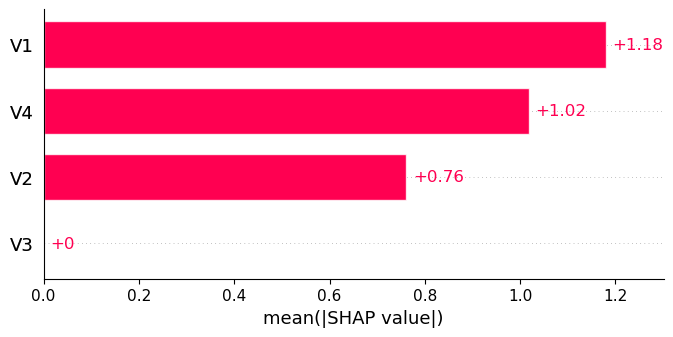

In [6]:
from xai.ExplainXGBoost import ExplainXGBoost

explainer = ExplainXGBoost(model_xgboost)
explainer.show_global_feature_importance_shap(X_train)

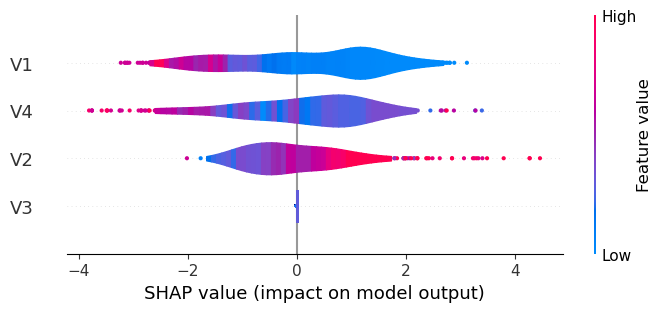

In [7]:
explainer.show_violin_summary_plot_shap(X_train)

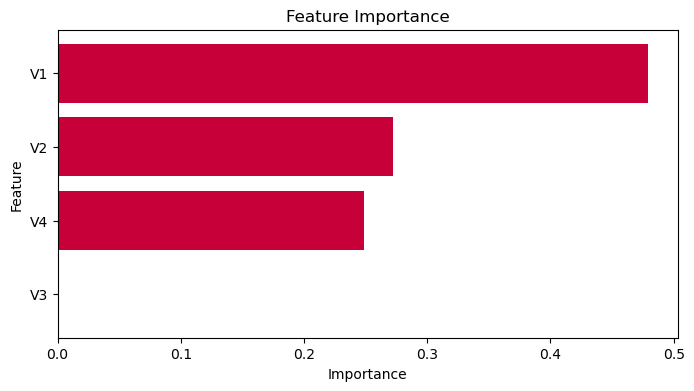

In [8]:
explainer.plot_feature_importance()

Feature Importance for Class 1 using SHAP


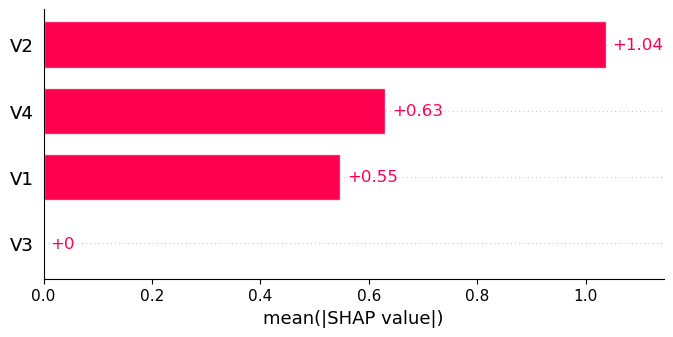

Feature Importance for Class 0 using SHAP


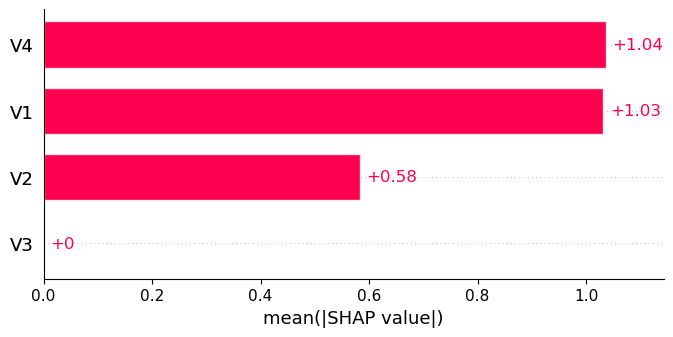

In [9]:
explainer.show_feature_importance_by_classes_shap(X_train, y_train)

# Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred))


Accuracy: 75.33%
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       120
           1       0.36      0.30      0.33        30

    accuracy                           0.75       150
   macro avg       0.60      0.58      0.59       150
weighted avg       0.74      0.75      0.74       150



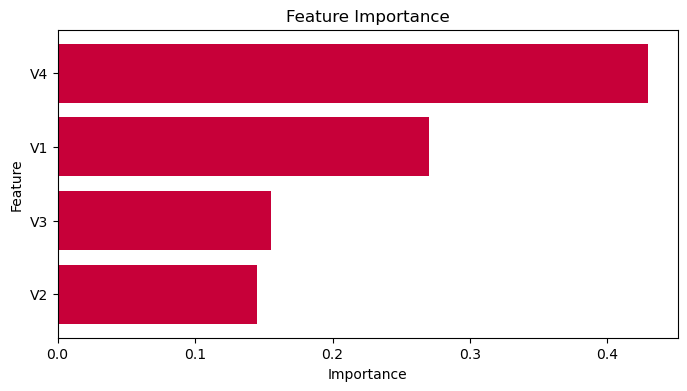

In [11]:
from xai.ExplainRandomForest import ExplainRandomForest

explainer = ExplainRandomForest(model_rf)
feature_names = X_train.columns
explainer.plot_feature_importance(feature_names=feature_names)

In [12]:
# import shap
# explainer = shap.explainers.Exact(model_rf.predict_proba, X_train)
# shap_values = explainer(X_train[:1000])

# shap_values = shap_values[..., 0]

# shap.plots.bar(shap_values)

# Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred = model_dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(classification_report(y_test, y_pred))


Accuracy: 77.33%
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       118
           1       0.47      0.44      0.45        32

    accuracy                           0.77       150
   macro avg       0.66      0.65      0.65       150
weighted avg       0.77      0.77      0.77       150



In [14]:
from xai.ExplainDecisionTree import ExplainDecisionTree

explainer = ExplainDecisionTree(model_dt)
explainer.plot_tree(X_train, y_train)
# in a pop-up window the tree is displayed